### In this notebook we will implements a classification model & perform cosine similarity  

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import pickle
from numpy import dot
from numpy.linalg import norm

In [3]:
# reading the stop words list with pickle
with open ('stop_words.ob', 'rb') as fp:
    domain_stop_word = pickle.load(fp)

In [4]:
# read data file
file_path = 'cardio_modelled.csv'
df = pd.read_csv(file_path)
print(df.head())

                               Disease  \
0                 VENTRICULAR ANEURYSM   
1  TRANSPOSITION OF THE GREAT ARTERIES   
2                    HYPOVOLEMIC SHOCK   
3                MYOCARDIAL INFARCTION   
4      FEMORAL AND POPLITEAL ANEURYSMS   

                                         Description  
0  signs, dyspnea, symptoms, artery, patients, ru...  
1  vsd, children, pda, asd, reveals, cyanosis, he...  
2  shock, ml, narrowing, respirations, tachycardi...  
3  vsd, infarction, shock, frequency, duration, a...  
4  leg, aneurysms, veins, thrombosis, gangrene, b...  


In [5]:
def clean_text_func(text):
    
    """ this function clean & pre-process the data  """

    text = str(text)
    text = text.lower()
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\?", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"[0-9]", " ", text)
    final_text = ""
    for x in text.split():
        if x not in domain_stop_word:
            final_text = final_text + x  +" "
    return final_text

df['Description'] = df['Description'].apply(lambda x: clean_text_func(x))
df.head()

,Disease,Description
0,VENTRICULAR ANEURYSM,signs dyspnea symptoms artery patients rupture...
1,TRANSPOSITION OF THE GREAT ARTERIES,vsd children pda asd reveals cyanosis heard au...
2,HYPOVOLEMIC SHOCK,shock ml narrowing respirations tachycardia di...
3,MYOCARDIAL INFARCTION,vsd infarction shock frequency duration arm da...
4,FEMORAL AND POPLITEAL ANEURYSMS,leg aneurysms veins thrombosis gangrene buerge...


# Words Embedding:

In [7]:
cv = CountVectorizer(stop_words="english")
cv_tfidf = TfidfVectorizer(stop_words="english")

X = cv.fit_transform(list(df.loc[:, 'Description' ]))
X_tfidf = cv_tfidf.fit_transform(df['Description'])

In [8]:
df_cv = pd.DataFrame(X.toarray() , columns=cv.get_feature_names_out())
df_tfidf = pd.DataFrame(X_tfidf.toarray() , columns=cv_tfidf.get_feature_names_out())
df_tfidf.head()

,abnormality,abruptly,absence,accumulation,acidosis,adolescence,adults,affects,agent,alternans,...,valvulitis,veins,ventricle,ventricles,vsd,weakness,weeks,wind,workload,worsen
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.142009,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.127459,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.196608,0.179482,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.129014,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.176228,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df_tfidf.shape)
cosine = lambda v1 , v2 : dot(v1 , v2) / (norm(v1) * norm(v2))

(29, 325)


### Cosine Similarity 

In [38]:
new_text = ["Patients may experience swelling in the legs, ischemia, and occasional spasms. Symptoms like cyanosis, hemoptysis, and hypotension may also occur, along with recurring episodes of discomfort and metabolic changes."]
new_text = [clean_text_func(new_text)]
new_text_cv = cv.transform(new_text)
new_text_tfidf = cv_tfidf.transform(new_text)

cos_sim = cosine_similarity(X_tfidf, new_text_tfidf)

df['Similarity'] = cos_sim

df

# for disease_number in range(int(df.shape[0])):
#     print(f"This is Disease number : {disease_number} ")
#     print(f"Cosin cv :    { cosine( df_cv.iloc[disease_number]  , new_text_cv )} ")
#     print(f"Cosin TFIDF : { cosine( df_tfidf.iloc[disease_number]  , new_text_tfidf) } ")

,Disease,Description,Similarity
0,VENTRICULAR ANEURYSM,signs dyspnea symptoms artery patients rupture...,0.151104
1,TRANSPOSITION OF THE GREAT ARTERIES,vsd children pda asd reveals cyanosis heard au...,0.029877
2,HYPOVOLEMIC SHOCK,shock ml narrowing respirations tachycardia di...,0.092966
3,MYOCARDIAL INFARCTION,vsd infarction shock frequency duration arm da...,0.053518
4,FEMORAL AND POPLITEAL ANEURYSMS,leg aneurysms veins thrombosis gangrene buerge...,0.114110
5,ABDOMINAL ANEURYSM,rupture aneurysms vsd aneurysm aorta unless he...,0.000000
6,HYPERTENSION,artery spasm vsd fainting producing crackles e...,0.206829
7,TETRALOGY OF FALLOT,children spasm spells thrombosis artery tetral...,0.229771
8,COARCTATION OF THE AORTA,artery coarctation myocarditis adolescence cau...,0.114550
9,MYOCARDITIS,vsd fatigue myocarditis frequency veins patien...,0.128362


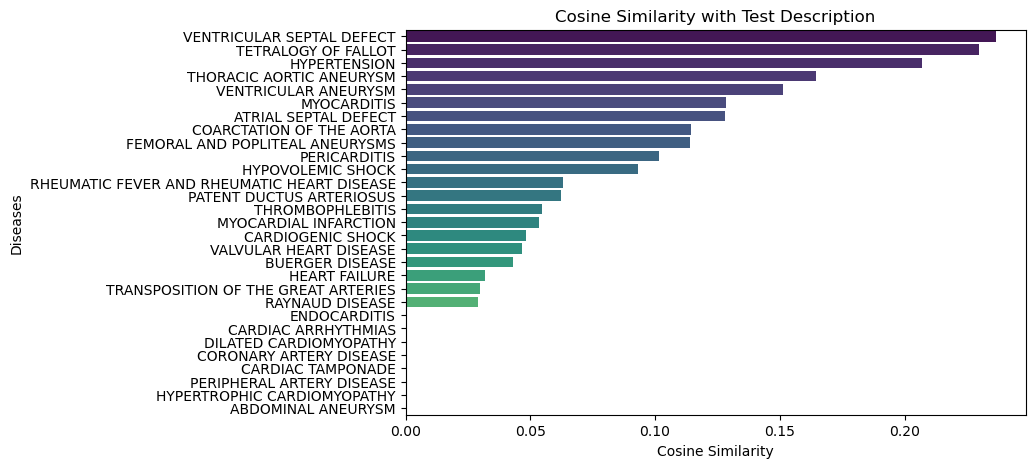

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
df_sorted = df.sort_values('Similarity', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Similarity', y='Disease', data=df_sorted, palette='viridis', hue = 'Disease')
plt.title("Cosine Similarity with Test Description")
plt.xlabel("Cosine Similarity")
plt.ylabel("Diseases")
plt.show()

### Implementing the classification model: LogisticRegression

In [14]:
df.columns

Index(['Disease', 'Description', 'Similarity'], dtype='object')

In [42]:
X_train = df.Description
y_train = df.Disease

In [52]:
cv1 = CountVectorizer()
X_train_cv1 = cv1.fit_transform(X_train)
pd_cv1 = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out())
pd_cv1.head()

,abnormality,abruptly,absence,accumulation,acidosis,across,adolescence,adults,affects,agent,...,valvulitis,veins,ventricle,ventricles,vsd,weakness,weeks,wind,workload,worsen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
lr = LogisticRegression()
lr.fit(X_train_cv1, y_train)

LogisticRegression()

In [62]:
X_test = "Patients may experience swelling in the legs, ischemia, and occasional spasms. Symptoms like cyanosis, hemoptysis, and hypotension may also occur, along with recurring episodes of discomfort and metabolic changes."
cleaned_text = clean_text_func(X_test)

In [64]:
X_test_cv3  = cv1.transform([cleaned_text])
y_pred_cv3 = lr.predict(X_test_cv3)
print(y_pred_cv3)

['HYPERTENSION']


### In conclusion our model is able to predict the disease, that given by user